# Assignment 7: Backpropagation
Read the Rojas book (https://page.mi.fu-berlin.de/rojas/neural/neuron.pdf), chapter 7.3.3 and learn about the "matrix way" of implementing backprop. 

## Ex. 7.1 XOR
Implement a two-layer artificial neural network with two input neurons and one output neuron. Choose the number of hidden neurons to your liking and add an error "neuron" to your network. Our goal is to learn the XOR function. What does the network return for random weights of all combinations of (binary) inputs? **(RESULT)**

In [1]:
# WTF is an ERROR NEURON? :D

In [214]:
import numpy as np

# Helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    x[x <= 0.0] = 0.0
    return x

In [54]:
# Datasets
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

y_and = [a & b for a, b in X]
y_or = [a | b for a, b in X]
y_xor = [a ^ b for a, b in X]

In [228]:
class GradientDescent:
    def __init__(self, lr):
        self.lr = lr
        
    def __call__(self, weights, gradients):
        """print("gradients: {}".format(gradients))
        print("gradients0: {}".format(gradients[0]))
        print("gradients1: {}".format(gradients[1]))
        print("weights: {}".format(weights))
        print("weights0: {}".format(weights[0]))
        print("weights1: {}".format(weights[1]))"""
        #print("gradients: " + str(gradients))
        
        update = weights
        """
        print("weights: " + str(weights))
        print(weights[0].shape)
        print(weights[1].shape)
        """
        for i in range(len(weights)):
            update[i] = weights[i] - self.lr * gradients[i] 
        """    
        print("Update: " + str(update)) 
        print(update[0].shape)
        print(update[1].shape)
        """
        return update

In [229]:
class Network():
    def __init__(self, hidden, m, optimizer=GradientDescent(5.)):
        self.hidden = hidden
        self.m = m
        self.optimizer = optimizer
        
    # Exercise 7.1
    def fit_wo_backprop(self, x, y, epochs=1):
        input_dim = len(x[0])
        if len(np.unique(y)) == 2:
            self.output_dim = 1
        else:
            self.output_dim = len(np.unique(y))
        
        self.init_weights(input_dim, self.output_dim, self.m)
        
        for epoch in range(epochs):
            for x_i, y_i in zip(x,y):
                prediction = self.predict(x_i)
                print("Input: " + str(x_i) + " , Label: " + str(y_i) + " , Prediction: " + str(prediction))
                
                
    # Exercise 7.2
    'TODO: fix to old version'
    def fit_with_backprop(self, x, y, epochs):
        input_dim = len(x[0])
        if len(np.unique(y)) == 2:
            self.output_dim = 1
        else:
            self.output_dim = len(np.unique(y))
        
        self.init_weights(input_dim, self.output_dim, self.m)
        
        for epoch in range(epochs):
            print("Epoch: " + str(epoch))
            predict_true = 0
            predict_false = 0
            
            for x_i, y_i in zip(x,y):
                outputs = self.feed_forward(x_i)
                gradients = self.backprop(outputs, y_i)
                self.W = self.optimizer(self.W, gradients)
                
                prediction = self.predict(x_i)
                
                if prediction == y_i:
                    predict_true += 1
                else:
                    predict_false += 1
                    
                print("Input: " + str(x_i) + ", Label: " + str(y_i) + ", Prediction: " + str(prediction))
                
            accuracy = predict_true/(predict_true+predict_false)   
            print("predicttrue: " + str(predict_true) + "; predictfalse: " + str(predict_false))
            print("Accuracy after epoch {}: {}".format(epoch, accuracy))
    
    # Exercise 7.3
    def fit_mnist(self, x, y, epochs):
        input_dim = len(x[0])
        self.output_dim = len(np.unique(y))
        
        self.init_weights(input_dim, self.output_dim, self.m)
        
        for epoch in range(epochs):
            i = 0
            print("Epoch: " + str(epoch))
            predict_true = 0
            predict_false = 0
            
            for x_i, y_i in zip(x,y):
                i+=1
                outputs = self.feed_forward(x_i)
                
                #onehot on the fly for mnist
                if self.output_dim != 1:
                    max_value = np.argmax(outputs[-1])
                    y_i_oh = np.zeros((10,))
                    y_i_oh[max_value] = 1.0 
                
                gradients = self.backprop(outputs, y_i_oh)
                self.W = self.optimizer(self.W, gradients)
                
                prediction = self.predict_onehot(x_i)
                
                if prediction == y_i:
                    predict_true += 1
                else:
                    predict_false += 1

                #if i == 1:
                #    break
                
            
            accuracy = predict_true/(predict_true+predict_false)   
            print("predicttrue: " + str(predict_true) + "; predictfalse: " + str(predict_false))
            print("Accuracy after epoch {}: {}".format(epoch, accuracy))
    
    def init_weights(self, input_dim, output_dim, m):
        self.W = []
        prev_dim = input_dim
        hidden_layer_dims = [m, output_dim] 
        
        for layer in range(self.hidden):
            layer_dim = hidden_layer_dims[layer]
            self.W.append(self.init_layer(prev_dim, layer_dim))
            prev_dim = layer_dim
    
    def init_layer(self, input_dim, output_dim):
        return np.random.random((input_dim, output_dim))
    
    def feed_forward(self, x):
        outputs = [x]
        out_last = x
        
        for W_i in self.W:
            #print("DURCHLAUF")
            #print("out_last: {} + SHAPE: {}".format(out_last, out_last.shape))
            #print("W_i: {} + SHAPE: {}".format(W_i, W_i.shape))
            out_last = sigmoid(out_last.dot(W_i))
            #print("out_last AFTER: {}".format(out_last))
            outputs.append(out_last)
                
        return outputs
    
    def backprop(self, outputs, y_i):
        gradients = []
        out_last = outputs[-1]
        out_last_prev = outputs[-2]
        
        e = out_last - y_i
        
        D = np.diag(out_last * (1 - out_last))
        delta = D.dot(e)
        
        gradient = np.outer(delta, out_last_prev).T
        gradients.append(gradient)

        for i in reversed(range(self.hidden)):
            output = outputs[i]
            D = np.diag(output * (1 - output))
            #print("output.shape: {}".format(output))
            #print("D.shape: {}".format(D))
            delta = D.dot(self.W[i]).dot(delta)
            gradients.append(np.outer(delta, outputs[i-1]).T)
        
        gradients.reverse()
        gradients = gradients[1:]
        
        #print(gradients)       
        
        return gradients
    
    def predict(self, x):
        out_last = self.feed_forward(x)[-1]
        out_last[out_last > .5] = 1
        out_last[out_last <= .5] = 0
        return out_last
    
    def predict_onehot(self, x):
        out_last = self.feed_forward(x)[-1]
        out_last = np.array(np.argmax(out_last)+1)
        out_last = out_last.astype(np.float64)
        return out_last
    

In [230]:
'param1 : number of hidden layers, param2: m -> number of nodes per hidden layer'
net = Network(2, 2, GradientDescent(.55))

print("####  Exercise 7.1  ####")
net.fit_wo_backprop(X, y_xor)

####  Exercise 7.1  ####
Input: [0 0] , Label: 0 , Prediction: [ 1.]
Input: [0 1] , Label: 1 , Prediction: [ 1.]
Input: [1 0] , Label: 1 , Prediction: [ 1.]
Input: [1 1] , Label: 0 , Prediction: [ 1.]


## Ex. 7.2 Backpropagation
Implement Backpropagation and optimize the weights of your neural network using the XOR training set: 

#### x, y

(0,0), 0 

(0,1), 1

(1,0), 1

(1,1), 0

How many training iterations do you need? Plot the network error over the number of iterations! **(RESULT)**

**We (usually) needed around 50-70 iterations with a standard gradient descent learning rate of 0.55.**

**Error = 1 - Accuracy**

In [232]:
print("####  Exercise 7.2  ####")
net.fit_with_backprop(X, y_xor, 200)

####  Exercise 7.2  ####
Epoch: 0
Input: [0 0], Label: 0, Prediction: [ 1.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 1.]
predicttrue: 2; predictfalse: 2
Accuracy after epoch 0: 0.5
Epoch: 1
Input: [0 0], Label: 0, Prediction: [ 1.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 1.]
predicttrue: 2; predictfalse: 2
Accuracy after epoch 1: 0.5
Epoch: 2
Input: [0 0], Label: 0, Prediction: [ 1.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 1.]
predicttrue: 2; predictfalse: 2
Accuracy after epoch 2: 0.5
Epoch: 3
Input: [0 0], Label: 0, Prediction: [ 1.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 1.]
predicttrue: 2; predictfalse: 2
Accuracy after epoch 3: 0.5
Epoch: 4
Input: [0 0], Labe

Input: [0 0], Label: 0, Prediction: [ 0.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 0.]
predicttrue: 4; predictfalse: 0
Accuracy after epoch 64: 1.0
Epoch: 65
Input: [0 0], Label: 0, Prediction: [ 0.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 0.]
predicttrue: 4; predictfalse: 0
Accuracy after epoch 65: 1.0
Epoch: 66
Input: [0 0], Label: 0, Prediction: [ 0.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 0.]
predicttrue: 4; predictfalse: 0
Accuracy after epoch 66: 1.0
Epoch: 67
Input: [0 0], Label: 0, Prediction: [ 0.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 0.]
predicttrue: 4; predictfalse: 0
Accuracy after epoch 67: 1.0
Epoch: 68
Input: [0 0], Label: 0, Prediction: [ 0.]
In

Accuracy after epoch 117: 1.0
Epoch: 118
Input: [0 0], Label: 0, Prediction: [ 0.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 0.]
predicttrue: 4; predictfalse: 0
Accuracy after epoch 118: 1.0
Epoch: 119
Input: [0 0], Label: 0, Prediction: [ 0.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 0.]
predicttrue: 4; predictfalse: 0
Accuracy after epoch 119: 1.0
Epoch: 120
Input: [0 0], Label: 0, Prediction: [ 0.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 0.]
predicttrue: 4; predictfalse: 0
Accuracy after epoch 120: 1.0
Epoch: 121
Input: [0 0], Label: 0, Prediction: [ 0.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 0.]
predicttrue: 4; predictfalse: 0
Accuracy after epoch 121: 1.0
Epoch:

Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 0.]
predicttrue: 4; predictfalse: 0
Accuracy after epoch 172: 1.0
Epoch: 173
Input: [0 0], Label: 0, Prediction: [ 0.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 0.]
predicttrue: 4; predictfalse: 0
Accuracy after epoch 173: 1.0
Epoch: 174
Input: [0 0], Label: 0, Prediction: [ 0.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 0.]
predicttrue: 4; predictfalse: 0
Accuracy after epoch 174: 1.0
Epoch: 175
Input: [0 0], Label: 0, Prediction: [ 0.]
Input: [0 1], Label: 1, Prediction: [ 1.]
Input: [1 0], Label: 1, Prediction: [ 1.]
Input: [1 1], Label: 0, Prediction: [ 0.]
predicttrue: 4; predictfalse: 0
Accuracy after epoch 175: 1.0
Epoch: 176
Input: [0 0], Label: 0, Prediction: [ 0.]
Input: [0 1], Label: 1, Prediction: 

# Ex. 7.3 MNIST (BONUS)
Train your network on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and state the model accuracy (or the model error) for the training and test sets. **(RESULT)** Compare to this [list](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354)


(60000, 28, 28)
(60000,)
4.0


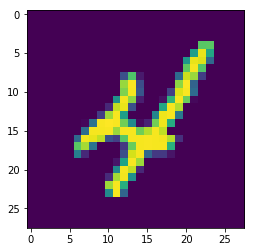

In [234]:
import torch
import torchvision
from PIL import Image
from matplotlib import pyplot as plt

mnist_data = torchvision.datasets.MNIST('./MNIST', train=True, transform=None, target_transform=None, download=True)
#data_loader = torch.utils.data.DataLoader(mnist_data, batch_size=4, shuffle=True, num_workers=2)


# Get data as numpy
np_images = np.empty([len(mnist_data), 28, 28])
np_labels = np.empty([len(mnist_data)])

for i, (image, label) in enumerate(mnist_data):
    data = (image, label)
    np_images[i] = np.array(data[0])
    np_labels[i] = data[1].item()
    
print(np_images.shape)
print(np_labels.shape)

#Flatten images first
images_flat = np_images.reshape(-1, 784)

#Normalize
images_flat = images_flat[:] / 255

# Show one example
print(np_labels[9])
plt.imshow(np_images[9])
plt.show()

In [235]:
print("####  Exercise 7.3  ####")
net_mnist = Network(2, 3, GradientDescent(.55))
net_mnist.fit_mnist(images_flat, np_labels, 2)

####  Exercise 7.3  ####
Epoch: 0
predicttrue: 5851; predictfalse: 54149
Accuracy after epoch 0: 0.09751666666666667
Epoch: 1
predicttrue: 5851; predictfalse: 54149
Accuracy after epoch 1: 0.09751666666666667


In [ ]:
#PROBLEM: Gradients[0] sind alle null. => Daher kein Learning.